In [64]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from scipy.stats import chi2_contingency
from sklearn.manifold import TSNE
from prince import FAMD
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [16]:
# import data
mytrain= pd.read_csv( 'C:\\Users\Alice\Downloads\German_Credit_TRAIN.csv')
mytest =  pd.read_csv( 'C:\\Users\Alice\Downloads\German_Credit_TEST.csv')
test =  pd.read_csv(r'C:\\Users\Alice\Downloads\test.csv')
dumtest= pd.read_csv('C:\\Users\Alice\Downloads\dummy german.csv')


In [35]:
mytrain.head()

,ID,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex,...,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Creditability
0,151,Negative,48,existing credits paid back duly till now,domestic appliances,3051,poor,1 to 4 years,middle,male,...,property,54,none,own,1,skilled employee,0,0,1,0
1,152,Negative,21,other bank,new car,571,poor,more than 7 years,the most,male,...,property,65,none,own,2,skilled employee,0,0,1,1
2,153,Negative,18,existing credits paid back duly till now,furniture/equipment,1345,poor,1 to 4 years,the most,male,...,property,26,none,own,1,skilled employee,0,0,1,0
3,154,Negative,15,existing credits paid back duly till now,business,806,poor,1 to 4 years,the most,Female,...,life insurance,22,none,own,1,unskilled,0,0,1,1
4,155,rich,4,existing credits paid back duly till now,new car,1494,none,less than 1 year,the last,male,...,property,29,none,own,1,unskilled,1,0,0,1


<AxesSubplot:xlabel='Account Balance', ylabel='count'>

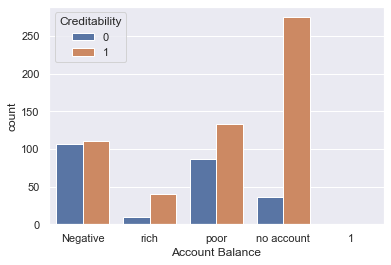

In [36]:
sns.countplot(x='Account Balance',hue ='Creditability',data=mytrain)

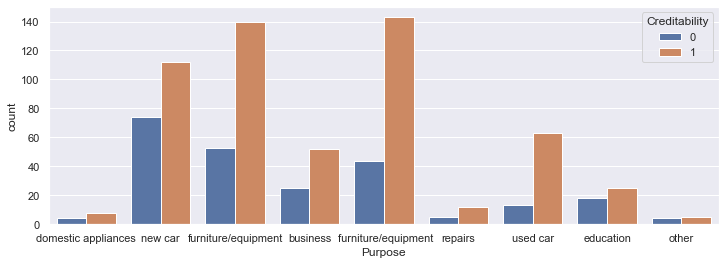

In [37]:
plt.figure(figsize=(12,4)) 
sns.countplot(x="Purpose",hue='Creditability', data=mytrain)
plt.show()
# used car could have higher chance to get money.
# furniture/ equipment is a popular reason to apply credit 

<AxesSubplot:xlabel='Type of apartment', ylabel='count'>

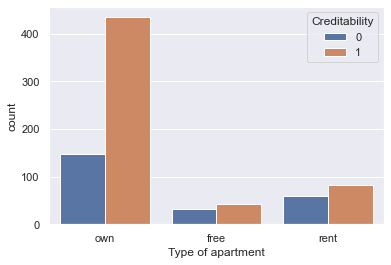

In [38]:
sns.countplot(x="Type of apartment",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

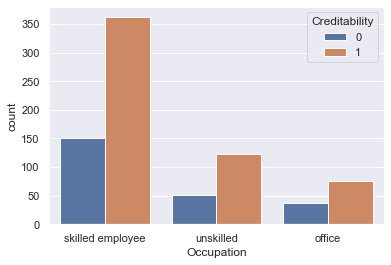

In [39]:
sns.countplot(x="Occupation",hue='Creditability', data=mytrain)
# skilled could get approval more

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

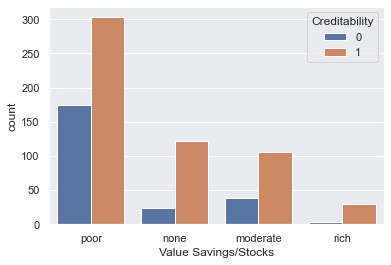

In [40]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)
# seems like it does not matter how many saving 

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

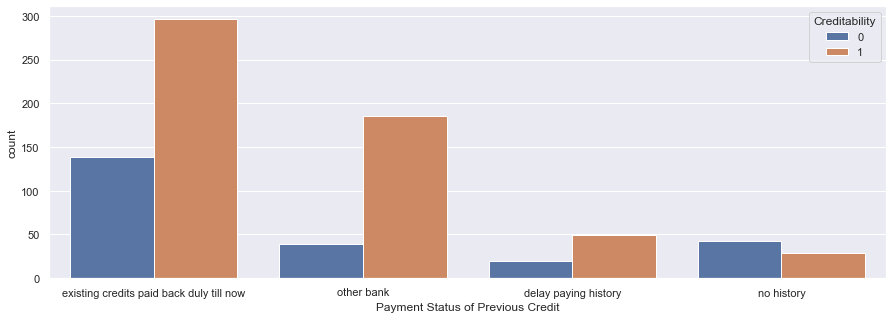

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x="Payment Status of Previous Credit",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Length of current employment', ylabel='count'>

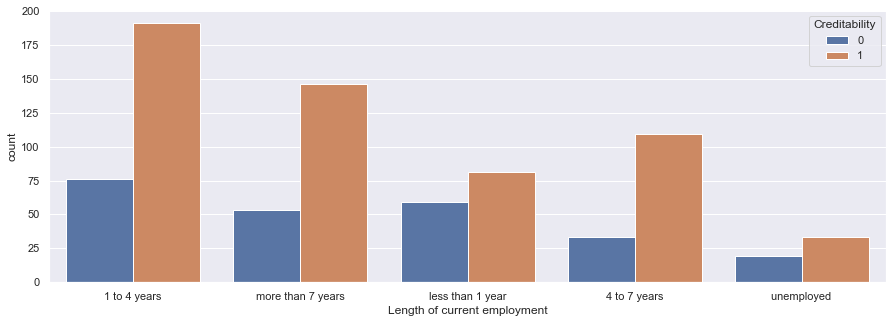

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x="Length of current employment",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Duration of Credit (month)', ylabel='count'>

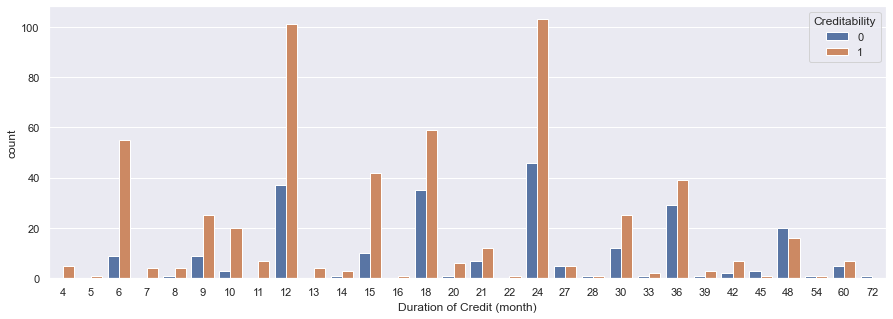

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x="Duration of Credit (month)",hue='Creditability', data=mytrain)
# lower duration could probably approve creditability 

<AxesSubplot:xlabel='Credit Amount', ylabel='Count'>

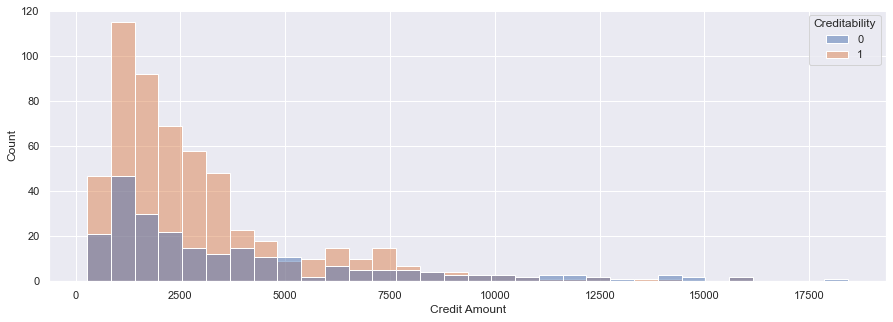

In [199]:
plt.figure(figsize=(15,5))
sns.histplot(x="Credit Amount",hue='Creditability', data=mytrain)
#skewed distribution and lower credit amount could have higher probaiblilty to get money  

<AxesSubplot:xlabel='Age (years)', ylabel='count'>

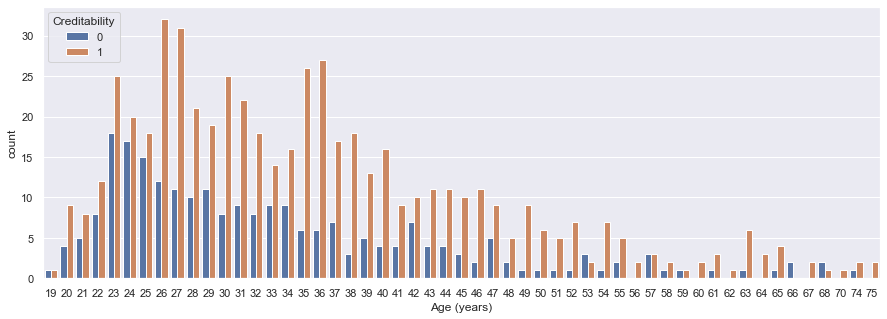

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age (years)",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Instalment per cent', ylabel='count'>

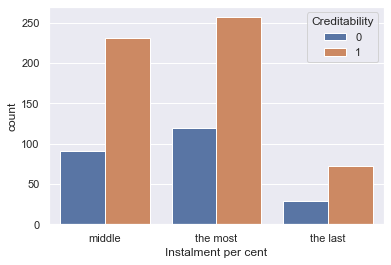

In [45]:

sns.countplot(x="Instalment per cent",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

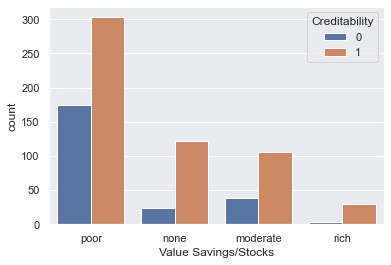

In [203]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Concurrent Credits', ylabel='count'>

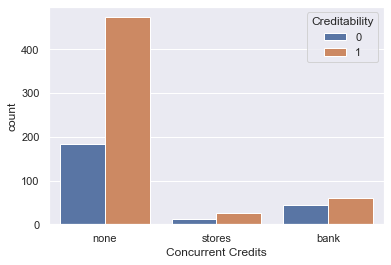

In [46]:

sns.countplot(x="Concurrent Credits",hue='Creditability', data=mytrain)

<AxesSubplot:xlabel='Most valuable available asset', ylabel='count'>

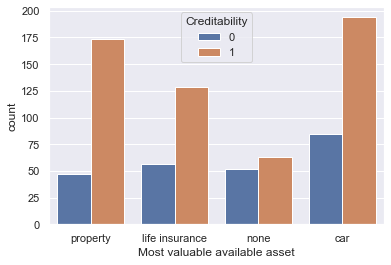

In [47]:
sns.countplot(x="Most valuable available asset",hue='Creditability', data=mytrain)

In [55]:
mytraindum=pd.get_dummies(mytrain, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation'])
mytraindum.head()

,ID,Duration of Credit (month),Credit Amount,Guarantors,Age (years),No of Credits at this Bank,No of dependents,Telephone,Foreign Worker,Creditability,...,Most valuable available asset_property,Concurrent Credits_bank,Concurrent Credits_none,Concurrent Credits_stores,Type of apartment_free,Type of apartment_own,Type of apartment_rent,Occupation_office,Occupation_skilled employee,Occupation_unskilled
0,151,48,3051,0,54,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
1,152,21,571,0,65,2,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0
2,153,18,1345,0,26,1,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
3,154,15,806,0,22,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
4,155,4,1494,0,29,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1


In [48]:
mytestdum=pd.get_dummies(mytest, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation'])

<AxesSubplot:xlabel='Credit Amount', ylabel='Duration of Credit (month)'>

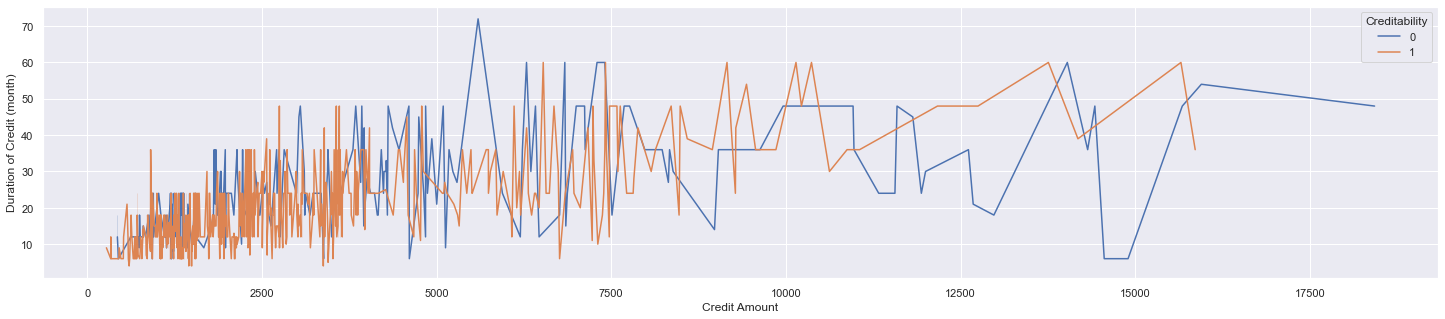

In [49]:
plt.figure(figsize=(25,5))
sns.lineplot(x='Credit Amount',y='Duration of Credit (month)',hue='Creditability', data=mytrain)


In [213]:
print(map1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Duration of Credit (month)                     800 non-null    int64
 1   Credit Amount                                  800 non-null    int64
 2   Guarantors                                     800 non-null    int64
 3   Age (years)                                    800 non-null    int64
 4   No of Credits at this Bank                     800 non-null    int64
 5   No of dependents                               800 non-null    int64
 6   Telephone                                      800 non-null    int64
 7   Foreign Worker                                 800 non-null    int64
 8   Creditability                                  800 non-null    int64
 9   Account Balance_Negative                       800 non-null    uint8
 10  Ac

In [56]:
map1= mytraindum.drop(['ID','Sex_Female','Sex_female','Payment Status of Previous Credit_delay paying history','Payment Status of Previous Credit_no history','Payment Status of Previous Credit_no history','Payment Status of Previous Credit_other bank','Purpose_business','Purpose_domestic appliances','Purpose_education','Purpose_other','Purpose_repairs','Payment Status of Previous Credit_existing credits paid back duly till now','Payment Status of Previous Credit_other bank','Account Balance_poor','Value Savings/Stocks_moderate','Length of current employment_more than 7 years','Instalment per cent_the most','Marital Status_married','Duration in Current address_5 to 7 years','Duration in Current address_more than 7 years','Most valuable available asset_life insurance','Occupation_unskilled','Concurrent Credits_stores','Type of apartment_rent','Type of apartment_free'],axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

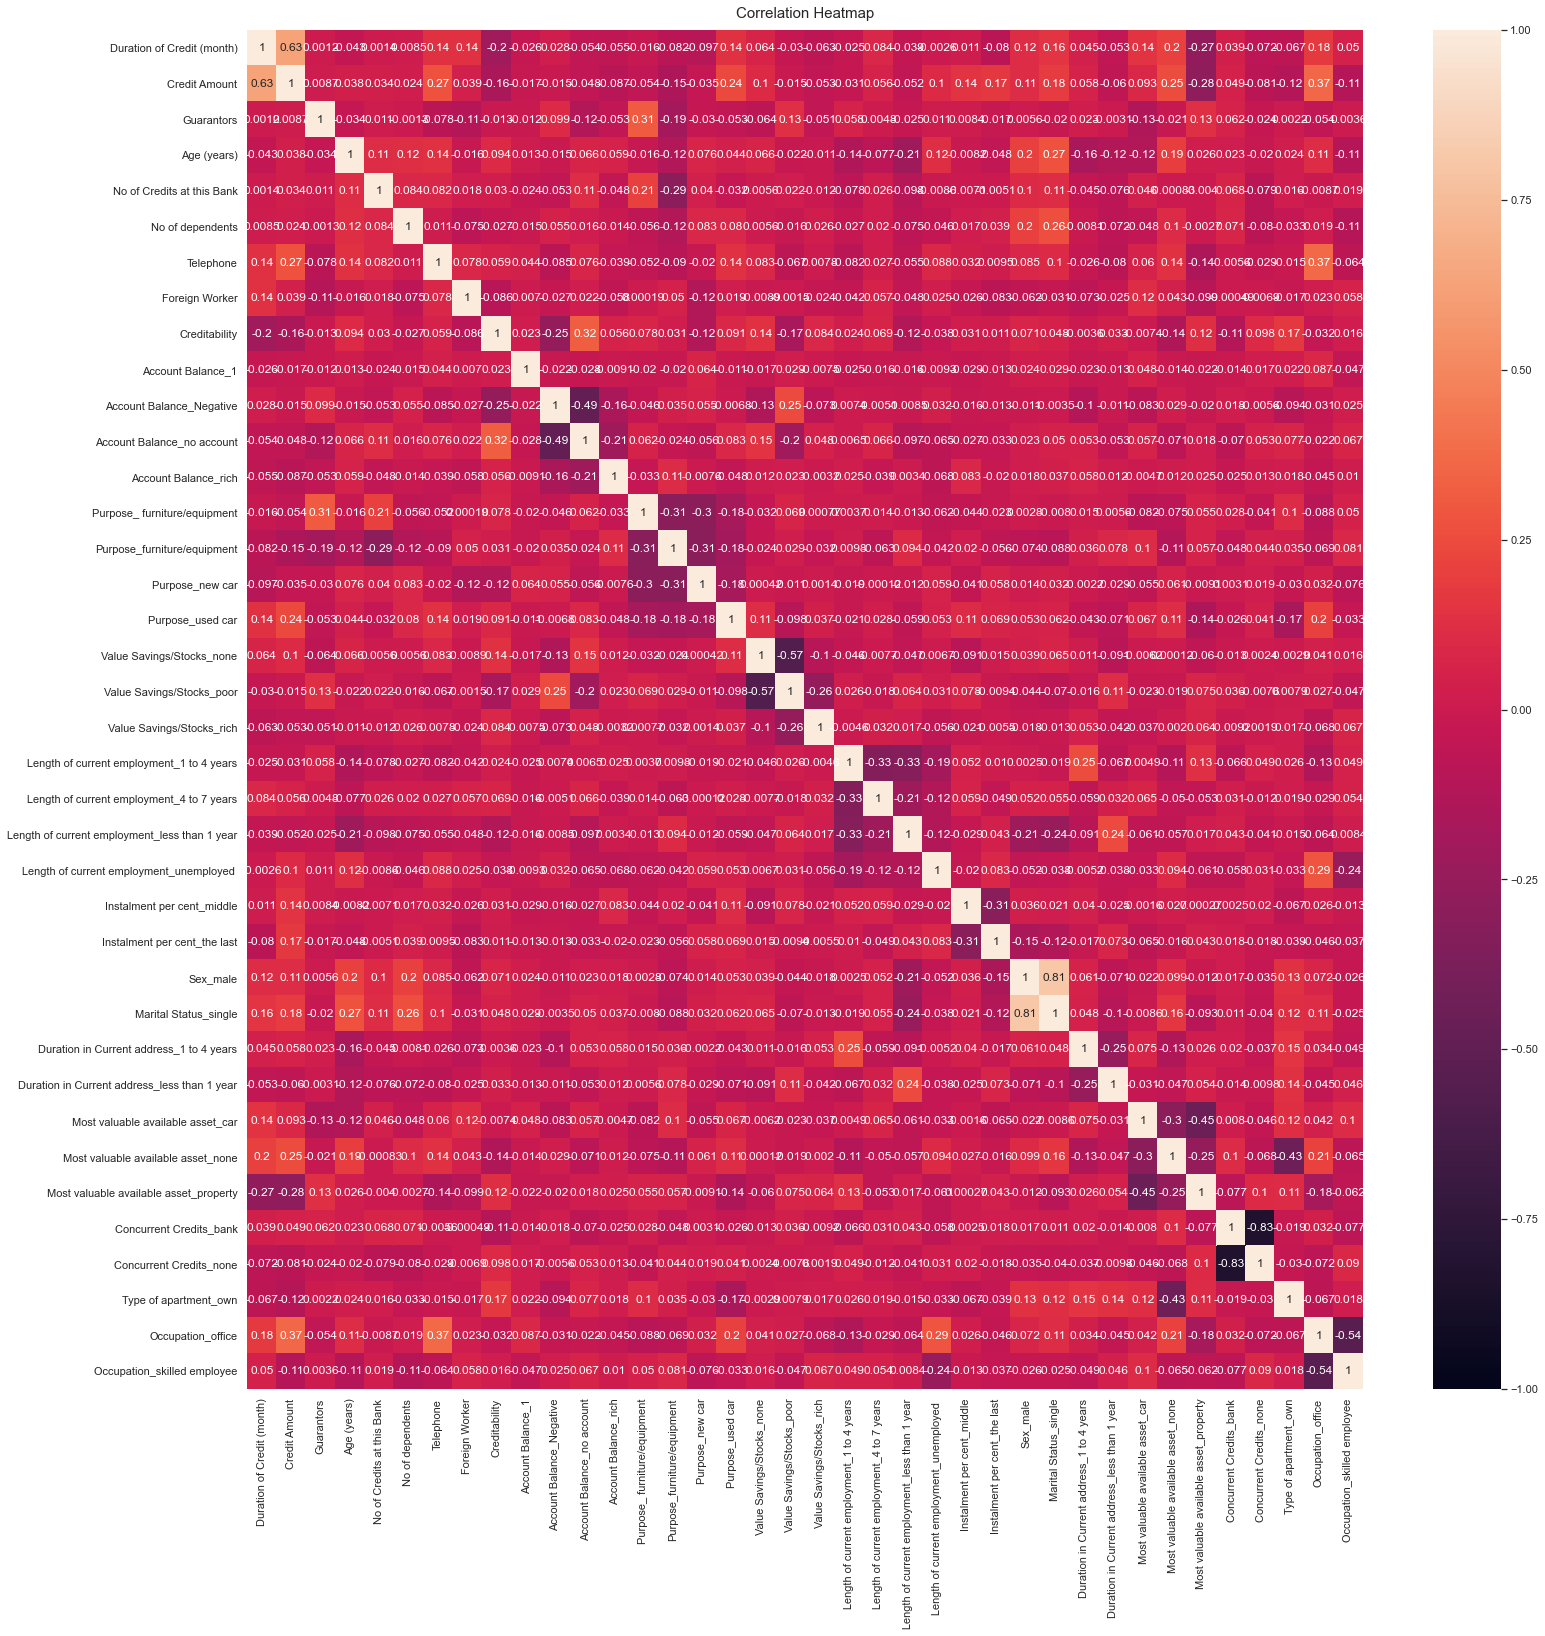

In [57]:
plt.figure(figsize=(25, 25))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(map1.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

In [58]:
#using RFE to select important feature for logistic regression 

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
model = LogisticRegression()
rfe = rfe.fit(mytraindum, mytraindum['Creditability'])


C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [59]:
print(rfe.support_)

# Foreign Worker,creditability, Account Balance_Negative , Account Balance_no account,Account Balance_poor, Purpose_education,Purpose_new car,Purpose_used car,Value Savings/Stocks_none,Value Savings/Stocks_poor,Value Savings/Stocks_rich,Payment Status of Previous Credit_no history,Length of current employment_1 to 4 years,Length of current employment_less than 1 year,Duration in Current address_less than 1 year, Most valuable available asset_none,Most valuable available asset_property,Concurrent Credits_bank,Type of apartment_own,Type of apartment_rent

# those variables above are selected based on RFE

[False False False False False False False False  True  True False  True
  True  True False False False False  True False  True False False  True
 False  True  True  True False False  True  True False False  True False
 False False False False False False False False False False False  True
 False False False  True  True  True False False False  True  True False
 False False]


In [60]:
print(rfe.ranking_)
#importance ranking 

[42 26 43 22 41  7 12  6  1  1 30  1  1  1  8  9 18 31  1 10  1 27 24  1
 14  1  1  1 38 21  1  1 37  2  1 35 20 16 15  4 19  5 13 39 40  3 25  1
 32 28 23  1  1  1 11 29 33  1  1 34 36 17]


In [61]:
print(mytraindum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 62 columns):
 #   Column                                                                      Non-Null Count  Dtype
---  ------                                                                      --------------  -----
 0   ID                                                                          800 non-null    int64
 1   Duration of Credit (month)                                                  800 non-null    int64
 2   Credit Amount                                                               800 non-null    int64
 3   Guarantors                                                                  800 non-null    int64
 4   Age (years)                                                                 800 non-null    int64
 5   No of Credits at this Bank                                                  800 non-null    int64
 6   No of dependents                                                  

In [62]:
cols= ['Foreign Worker','Account Balance_Negative','Account Balance_no account','Account Balance_poor','Purpose_education','Purpose_new car','Purpose_used car','Value Savings/Stocks_none','Value Savings/Stocks_poor','Value Savings/Stocks_rich','Payment Status of Previous Credit_no history','Length of current employment_1 to 4 years','Length of current employment_less than 1 year','Duration in Current address_less than 1 year','Most valuable available asset_none','Most valuable available asset_property','Concurrent Credits_bank','Type of apartment_own','Type of apartment_rent']

X= mytraindum[cols]
y=mytraindum['Creditability']


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.501459
         Iterations 7
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.177     
Dependent Variable:           Creditability             AIC:                       599.6344  
Date:                         2021-05-20 14:36          BIC:                       681.8652  
No. Observations:             560                       Log-Likelihood:            -280.82   
Df Model:                     18                        LL-Null:                   -341.23   
Df Residuals:                 541                       LLR p-value:               2.9249e-17
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               7.0000                                                         
--------------------------------------------------------------------------------------------

In [77]:
X_train

,Account Balance_no account,Purpose_new car,Purpose_used car,Value Savings/Stocks_none,Value Savings/Stocks_rich,Payment Status of Previous Credit_no history,Length of current employment_less than 1 year,Duration in Current address_less than 1 year,Most valuable available asset_property,Type of apartment_own
77,0,1,0,0,0,0,0,0,0,1
409,0,0,0,0,0,0,0,1,0,1
567,0,0,0,0,0,0,0,0,0,1
483,1,1,0,1,0,0,0,0,0,0
109,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,0,1,1,1,0
192,0,1,0,0,0,0,1,0,0,1
629,0,1,0,0,0,0,0,0,0,0
559,0,0,0,0,0,0,0,0,0,1


In [82]:
cols= ['Account Balance_no account','Purpose_new car','Purpose_used car','Value Savings/Stocks_none','Value Savings/Stocks_rich','Payment Status of Previous Credit_no history','Length of current employment_less than 1 year','Duration in Current address_less than 1 year','Most valuable available asset_property','Type of apartment_own',]

X_train= X_train[cols]
X_test= X_test[cols]


In [78]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.510110
         Iterations 6
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.163     
Dependent Variable:           Creditability             AIC:                       591.3227  
Date:                         2021-05-20 14:40          BIC:                       634.6021  
No. Observations:             560                       Log-Likelihood:            -285.66   
Df Model:                     9                         LL-Null:                   -341.23   
Df Residuals:                 550                       LLR p-value:               8.6065e-20
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               6.0000                                                         
--------------------------------------------------------------------------------------------

In [79]:
logreg = LogisticRegression()

In [80]:

from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [75]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 33  40]
 [ 18 149]]


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53        73
           1       0.79      0.89      0.84       167

    accuracy                           0.76       240
   macro avg       0.72      0.67      0.68       240
weighted avg       0.75      0.76      0.74       240



In [96]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [99]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7125
